## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [6]:
data = pd.read_csv('D:/BIA Data Science & AI/ML/yahoo_stock.csv')

In [8]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


## Data Preprocessing

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)
stock_data = data['Close']

## Training the ARIMA Model

In [15]:
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

In [17]:
p, d, q = 1, 1, 1
model_arima = ARIMA(train, order = (p, d, q))
results_arima = model_arima.fit()

## Forecasting the ARIMA Model

In [32]:
forecast_arima = results_arima.predict(start = len(train), \
                                      end = len(train) + len(test) - 1, \
                                      typ = 'levels')

# Training SARIMA Model

In [34]:
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12
model_sarima = SARIMAX(train, order = (p, d, q), \
                      seasonal_order = (P, D, Q, s))
results_sarima = model_sarima.fit()

## Forecasting the SARIMA Model

In [37]:
forecast_sarima = results_sarima.predict(start = len(train), \
                                        end = len(train) + len(test) - 1, \
                                        typ = 'levels')

## Plotting ARIMA and SARIMA Forecasts

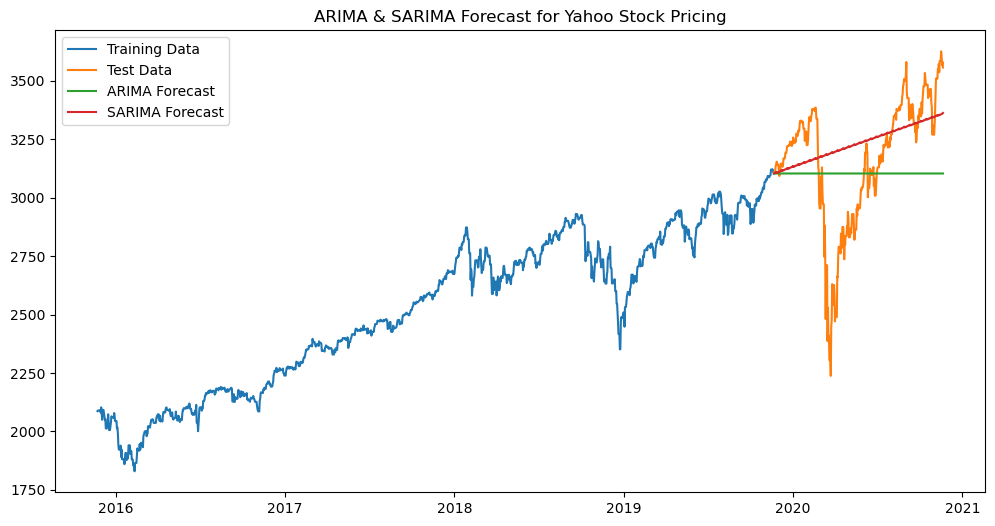

In [40]:
plt.figure(figsize = (12, 6))
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(forecast_arima, label = 'ARIMA Forecast')
plt.plot(forecast_sarima, label = 'SARIMA Forecast')
plt.title('ARIMA & SARIMA Forecast for Yahoo Stock Pricing')
plt.legend()
plt.show()